## K-fold sul tempo

In [72]:
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from tqdm import tqdm
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedKFold
import pydotplus
import random

# Load the CSV file into a Pandas DataFrame
df = pd.read_excel('train.xlsx')

# Split the data into features (X) and target (y)
row_deleted = ['Nodes', 'Type']
df1 = df.sample(frac=1, random_state= random.randint(0,100)).reset_index(drop=True)
X = df1.drop(row_deleted, axis=1)
y = df1['Type']
x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
 
scores = []
scores = cross_val_score(clf, X, y, cv = 5)

print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.87059462 0.86742622 0.86866319 0.86974826 0.87172309]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.870 +/- 0.001
****************************************************************************************************




In [73]:
col_name = X.columns
col_name

feature_importances = clf.feature_importances_
num_features = len(feature_importances)

print("Feature Importance:")
for i in range(num_features):
    print(f"{col_name[i]}: {feature_importances[i]}")

Feature Importance:
deg_ranks: 0.03517603074199192
closeness: 0.1006606970400487
betweennes: 0.0665055401361167
ext_perc: 0.19623459022631554
ext_norm: 0.08354582784202978
eig_centrality: 0.16507901011382634
pg_ranks: 0.09280412960897158
node_strength: 0.2599941742906995


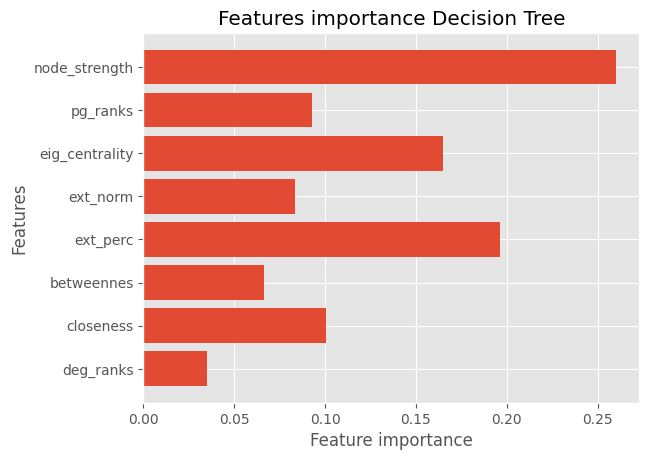

In [78]:
plt.barh(col_name, feature_importances)

# Adding labels and title
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('Features importance Decision Tree')

# Display the plot
plt.show()

In [74]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[49079,  2460,  1429],
       [ 2361,  7676,   707],
       [ 1361,   699,  3348]])

[[ 1.34293747  0.21045223 -0.05498752 ... -0.39946618 -0.83955861
   0.20757322]
 [-3.04396511 -1.05139308 -1.07194716 ...  0.43861063  0.01744528
  -0.2247499 ]
 [-0.39914871  0.5374989   0.43352992 ... -0.43374541 -0.02699863
   0.17823881]
 ...
 [-3.31818534 -0.73171289 -0.74527031 ...  0.37118545 -0.29958344
   0.1020401 ]
 [-0.06347979  1.19479346  1.61680076 ... -0.12675455  0.22827395
  -0.21016583]
 [-2.62760459 -0.53495759  0.47541325 ...  0.4509047   0.16293877
   0.19077208]]


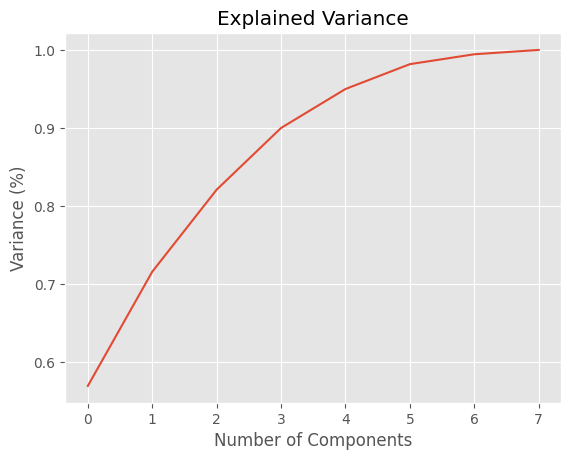

,PC-1,PC-2,PC-3,PC-4,PC-5
0,1.342937,0.210452,-0.054988,-0.951980,0.203245
1,-3.043965,-1.051393,-1.071947,-0.101013,0.681197
2,-0.399149,0.537499,0.433530,0.327574,0.477967
3,-1.090905,0.257436,-0.297413,0.377887,0.102588
4,-2.031534,-0.580708,-0.096084,-0.206438,1.125431
...,...,...,...,...,...
230395,-0.310792,0.730738,-0.562798,-0.351837,1.606441
230396,0.526684,2.724384,0.806576,-0.541989,-0.682094
230397,-3.318185,-0.731713,-0.745270,0.160487,-0.100829
230398,-0.063480,1.194793,1.616801,-0.049347,0.153373


In [81]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

# Feature selection using the Principal Components Analysis
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
print(principalComponents)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

# The variance of 25% is reached using 4 features, so we keep only 4
pca = PCA(n_components=5)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4', 'PC-5'])
principal_x


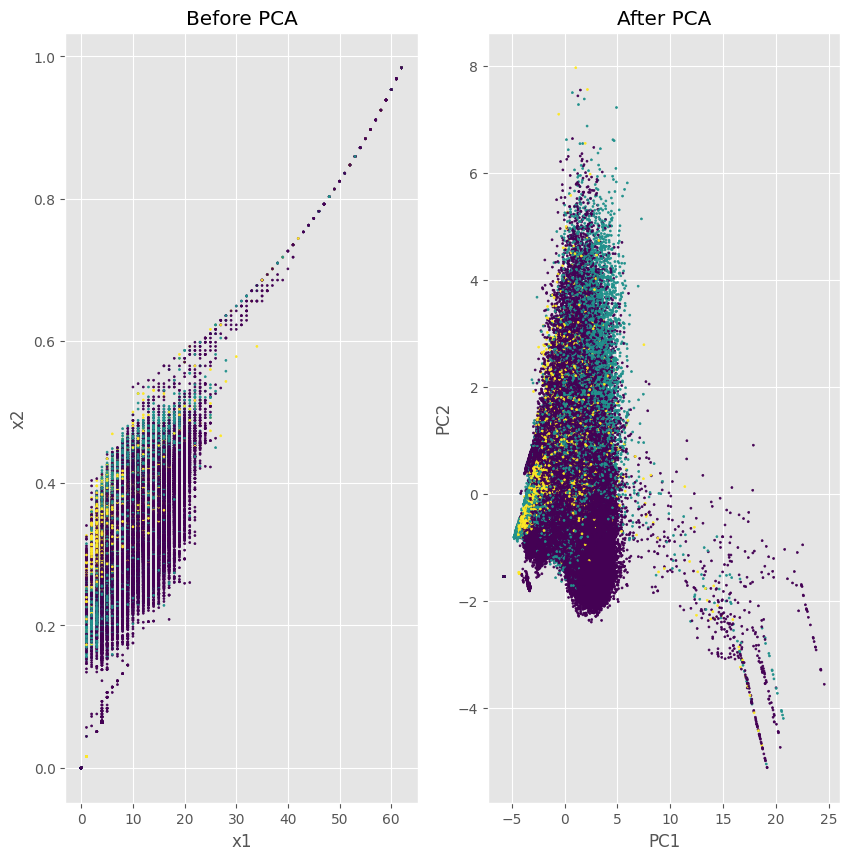

In [82]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(10, 10))
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=2)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(new_data[:,0], new_data[:,1], c=y, s=2)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [83]:
x_train,x_test, y_train,  y_test = train_test_split(principal_x, y, test_size = 0.30)


scores = []
clf = tree.DecisionTreeClassifier(criterion='gini', random_state = 1)
scores = cross_val_score(clf, X, y, cv = 5)
clf.fit(x_train, y_train)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.87016059 0.86773003 0.86976997 0.86983507 0.87137587]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.870 +/- 0.001
****************************************************************************************************




In [84]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[46961,  3687,  2319],
       [ 3500,  6622,   691],
       [ 2089,   671,  2580]])

## K-fold per nodo

In [187]:
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from tqdm import tqdm
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedKFold
import pydotplus
import random
import seaborn as sns

df = pd.read_excel('train.xlsx')
df = df.fillna(0)

# select nodes which will be use for test
node=[]
for i in range(21):
    n = random.randint(1,64)
    node.append(n)
print(node)

[45, 2, 9, 34, 11, 10, 43, 39, 31, 32, 63, 46, 52, 25, 31, 62, 45, 3, 3, 42, 43]


In [188]:
df1 = df[~df['Nodes'].isin(node)]
test = df[df['Nodes'].isin(node)] 
row_deleted = ['Nodes', 'Type']
df2 = df1.sample(frac=1, random_state= random.randint(0,100)).reset_index(drop=True)
y = df2['Type']
X= df2.drop(row_deleted, axis=1)
y_test = test['Type']
x_test= test.drop(row_deleted, axis=1)

test

,Nodes,Type,deg_ranks,closeness,betweennes,ext_perc,ext_norm,eig_centrality,pg_ranks,node_strength
1,2,1,12,0.396226,0.012801,0.416667,0.714286,0.004167,0.015334,5.372472
2,3,1,12,0.396226,0.019713,0.416667,0.714286,0.004167,0.015334,5.169915
8,9,1,2,0.276316,0.000000,1.000000,0.285714,0.000427,0.004933,0.581210
9,10,1,10,0.351955,0.015873,0.900000,1.285714,0.002449,0.015556,3.649094
10,11,1,13,0.377246,0.020737,0.923077,1.714286,0.003642,0.019295,5.178953
...,...,...,...,...,...,...,...,...,...,...
230380,45,1,13,0.316144,0.000256,0.615385,0.888889,0.057332,0.019406,6.843730
230381,46,1,14,0.328042,0.020737,0.642857,1.000000,0.059299,0.020809,6.832238
230387,52,1,12,0.316144,0.004096,0.583333,1.000000,0.054236,0.018256,6.209175
230397,62,1,4,0.267613,0.000000,0.000000,0.000000,0.000106,0.012364,2.746237



****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.85407801 0.85561466 0.85916076 0.85561466 0.85579196 0.85106383
 0.85555556 0.85585106 0.85596927 0.85496454]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.855 +/- 0.002
****************************************************************************************************




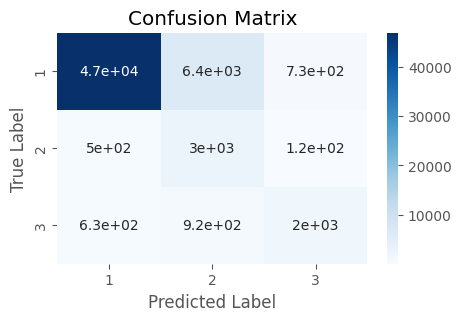

In [189]:
#x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf.fit(X, y)
 
scores = []
scores = cross_val_score(clf, X, y, cv = 10)

print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [179]:
col_name = X.columns
col_name

feature_importances = clf.feature_importances_
num_features = len(feature_importances)

print("Feature Importance:")
for i in range(num_features):
    print(f"{col_name[i]}: {feature_importances[i]}")

Feature Importance:
deg_ranks: 0.06654141399451806
closeness: 0.11180857308758729
betweennes: 0.048983187181163367
ext_perc: 0.2535681603241152
ext_norm: 0.07738404442908002
eig_centrality: 0.1272080002131316
pg_ranks: 0.06460807475372107
node_strength: 0.24989854601668324


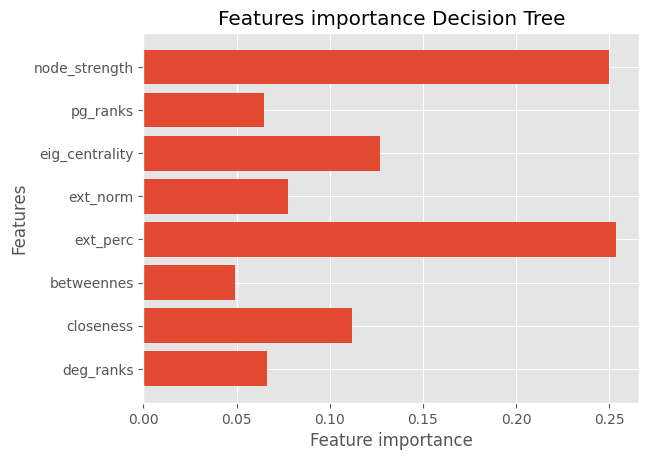

In [180]:
plt.barh(col_name, feature_importances)

# Adding labels and title
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('Features importance Decision Tree')

# Display the plot
plt.show()

[[-2.80524244 -0.55263324 -0.01835328 ...  0.44115031 -0.06943925
   0.01270711]
 [-0.01117916 -0.14155374  0.78937245 ...  0.37849016 -0.31519392
  -0.11335659]
 [ 0.5765456  -0.10798877  0.61661902 ... -0.13664458 -0.74704006
  -0.28077578]
 ...
 [ 0.18116812  0.01365663 -0.79708017 ... -0.4888188   0.11073021
   0.13680565]
 [ 0.08774283 -0.45234142 -0.03921054 ... -0.28099531  0.09897504
   0.12556103]
 [-0.07061572  0.23641539  0.26486735 ... -0.19656094  0.32228028
   0.14237744]]


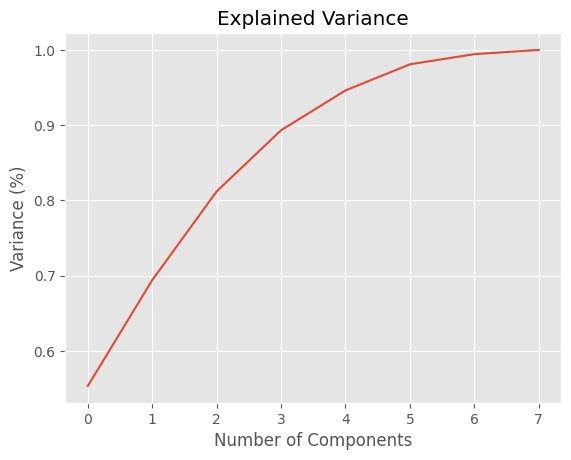

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-2.805242,-0.552633,-0.018353,-0.135711,-0.550140
1,-0.011179,-0.141554,0.789372,0.589208,-0.694674
2,0.576546,-0.107989,0.616619,0.525879,-0.122224
3,-2.752089,0.689887,2.423812,-0.957240,0.491538
4,-2.831379,-0.545395,-0.784564,0.543858,0.315801
...,...,...,...,...,...
169195,0.098907,0.246522,1.610415,0.016221,-0.684127
169196,-1.617547,-0.499929,-1.001979,1.136965,1.161605
169197,0.181168,0.013657,-0.797080,0.568367,-0.133878
169198,0.087743,-0.452341,-0.039211,0.711165,-0.905190


In [181]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

# Feature selection using the Principal Components Analysis
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
print(principalComponents)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

# The variance of 25% is reached using 4 features, so we keep only 4
pca = PCA(n_components=5)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4', 'PC-5'])
principal_x

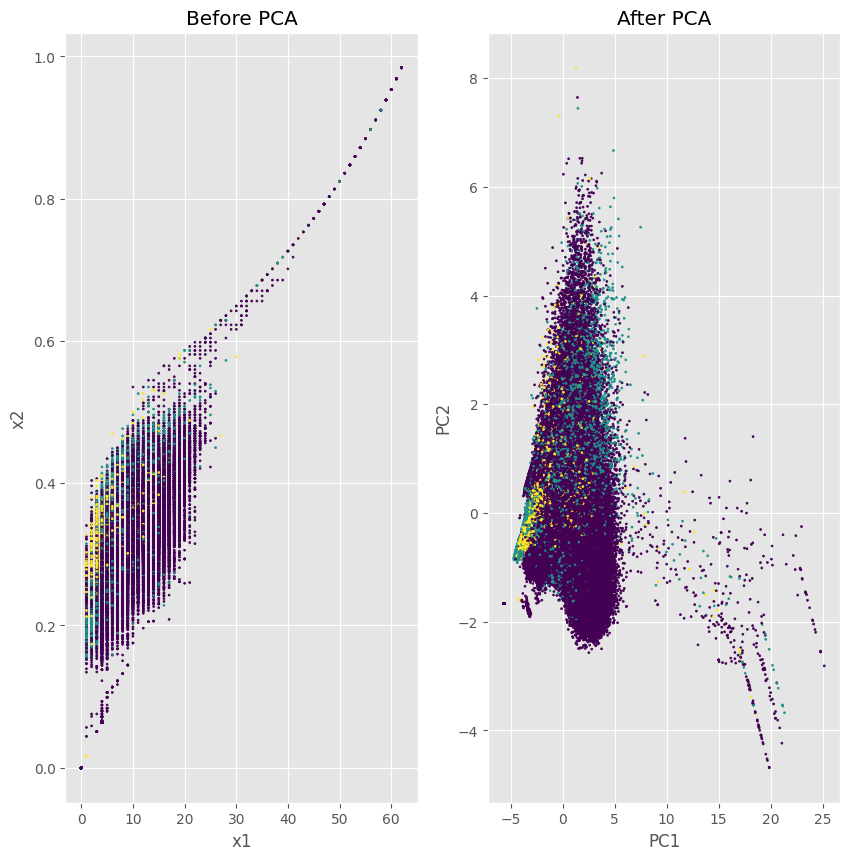

In [182]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(10, 10))
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c=y, s=2)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(new_data[:,0], new_data[:,1], c=y, s=2)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [183]:
x_test_transform = scalar.fit_transform(x_test)
new_data = pca.fit_transform(x_test_transform)
x_test_new = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4', 'PC-5'])


#x_train,x_test, y_train,  y_test = train_test_split(principal_x, y, test_size = 0.30)


scores = []
#clf = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_val_score(clf, principal_x, y, cv = 10)
clf.fit(principal_x, y)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.83605201 0.84060284 0.83622931 0.83593381 0.83463357 0.8392435
 0.83841608 0.83687943 0.83540189 0.82984634]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.836 +/- 0.003
****************************************************************************************************


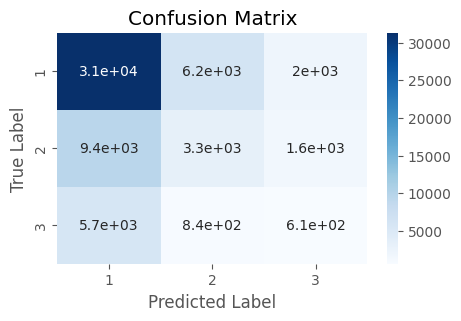

In [184]:
y_pred = clf.predict(x_test_new)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Applied to Patient 5

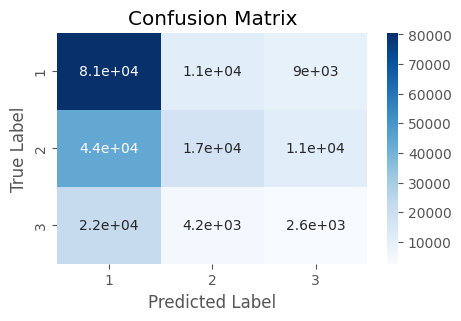

In [190]:
df = pd.read_excel('train_pat5.xlsx')
df = df.fillna(0)
row_deleted = ['Nodes', 'Type']
y_test = df['Type']
X= df.drop(row_deleted, axis=1)
y_pred = clf.predict(X)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Decision tree: involved or not involved

In [ ]:
import pandas as pd
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from tqdm import tqdm
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import StratifiedKFold
import pydotplus
import random


df = pd.read_excel('train2_pat4.xlsx')
df = df.fillna(0)

# select nodes which will be use for test
node=[]
for i in range(21):
    n = random.randint(1,64)
    node.append(n)
print(node)
df1 = df[~df['Nodes'].isin(node)]
test = df[df['Nodes'].isin(node)] 
row_deleted = ['Nodes', 'Type']
df2 = df1.sample(frac=1, random_state= random.randint(0,100)).reset_index(drop=True)
y = df2['Type']
X= df2.drop(row_deleted, axis=1)
y_test = test['Type']
x_test= test.drop(row_deleted, axis=1)
test

In [ ]:

#x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf.fit(X, y)
 
scores = []
scores = cross_val_score(clf, X, y, cv = 10)

print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.93376543 0.93462963 0.9337037  0.93111111 0.93512346 0.93382716
 0.93117284 0.93080247 0.9341358  0.93191358]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.933 +/- 0.002
****************************************************************************************************




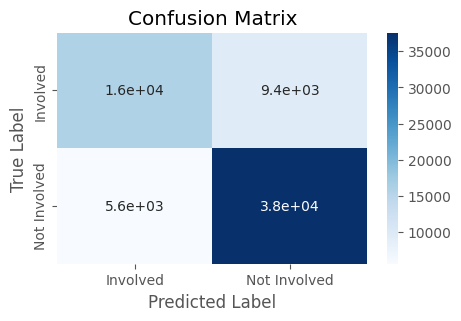

In [ ]:
import seaborn as sns

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Feature Importance:
deg_ranks: 0.06903132068744174
closeness: 0.04091726198804015
betweennes: 0.03240813134185976
ext_perc: 0.28075082252128153
ext_norm: 0.16771632792389032
eig_centrality: 0.18292633734833533
pg_ranks: 0.04942778525616119
node_strength: 0.17682201293299


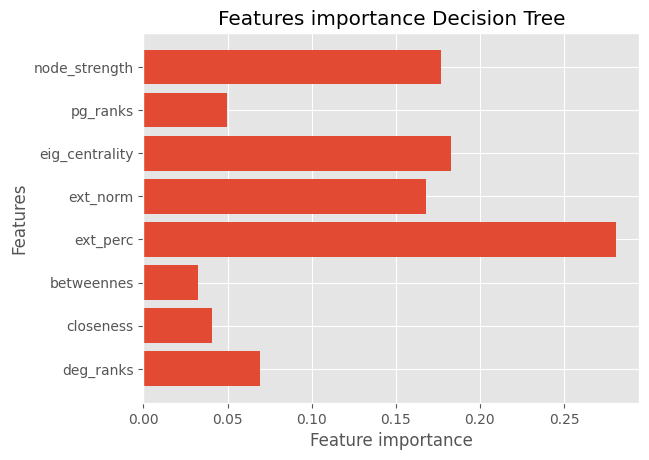

In [ ]:
col_name = X.columns
col_name

feature_importances = clf.feature_importances_
num_features = len(feature_importances)

print("Feature Importance:")
for i in range(num_features):
    print(f"{col_name[i]}: {feature_importances[i]}")
plt.barh(col_name, feature_importances)

# Adding labels and title
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('Features importance Decision Tree')

# Display the plot
plt.show()

[[-1.89361956e+00  1.15053791e+00 -1.12145152e-01 ...  5.02575762e-01
   2.11241819e-01  6.70795000e-02]
 [ 4.50642875e+00  2.23637304e+00 -4.39147827e-01 ...  2.65233777e-01
  -7.40998781e-01 -1.00409368e-01]
 [ 1.39899390e+00  1.28134634e+00  4.26691923e-01 ...  6.09884773e-01
  -5.88111242e-01 -2.40241098e-01]
 ...
 [-1.11096446e+00  3.65170946e-01 -1.25658104e+00 ... -3.07461375e-01
   7.94258366e-04  1.71956012e-01]
 [-1.61925288e+00  1.33954312e+00  1.43515904e+00 ...  3.36392827e-01
   1.46648251e-03 -2.73303464e-01]
 [-1.01070363e+00 -1.12736333e-01  1.17863148e+00 ... -5.07107481e-01
  -1.25974766e-01 -6.48434438e-02]]


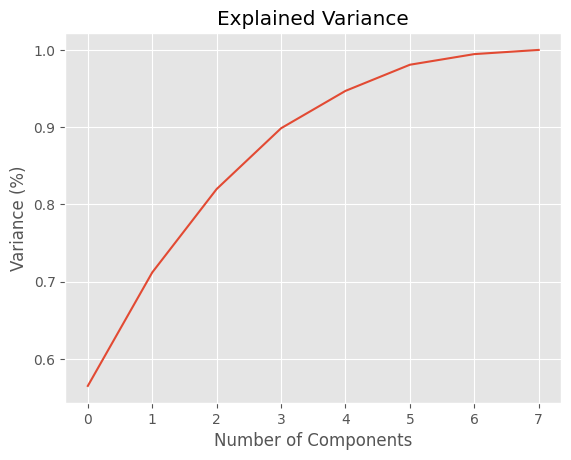

,PC-1,PC-2,PC-3,PC-4
0,-1.893620,1.150538,-0.112145,-0.989371
1,4.506429,2.236373,-0.439148,-0.906038
2,1.398994,1.281346,0.426692,0.280761
3,0.722533,-0.791083,0.499996,0.702144
4,-2.505263,-1.327697,1.176610,-0.379898
...,...,...,...,...
161995,-0.413861,-0.379801,1.070383,0.377738
161996,1.773397,-1.723778,-0.632392,-1.324382
161997,-1.110964,0.365171,-1.256581,0.650984
161998,-1.619253,1.339543,1.435159,-0.890946


In [ ]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

# Feature selection using the Principal Components Analysis
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
print(principalComponents)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

# The variance of 25% is reached using 4 features, so we keep only 4
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])
principal_x

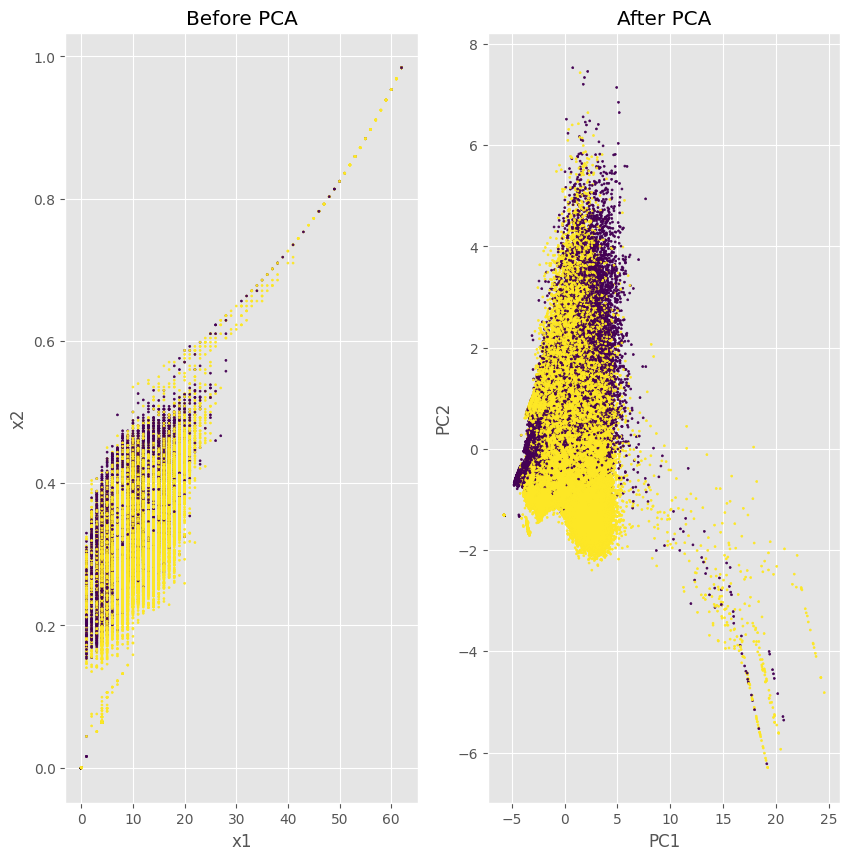

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
color = np.arange(len(y))
for i in range(len(y)): 
    if y[i] == 'Involved':
        color[i] = 1
    else:
        color[i] = 2
fig, axes = plt.subplots(1,2, figsize=(10, 10))
axes[0].scatter(X.iloc[:,0], X.iloc[:,1], c=color, s=2)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(new_data[:,0], new_data[:,1], c=color, s=2)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [ ]:
x_test_transform = scalar.fit_transform(x_test)
new_data = pca.fit_transform(x_test_transform)
x_test_new = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

#x_train,x_test, y_train,  y_test = train_test_split(principal_x, y, test_size = 0.30)

scores = []
#clf = tree.DecisionTreeClassifier(criterion='gini')
scores = cross_val_score(clf, principal_x, y, cv = 10)
clf.fit(principal_x, y)
print("\n" + ("*" * 100))
print("The cross-validation scores using cross_val_score method are \n{0}".format(scores))
print("*" * 100)
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using cross_val_score method is %.3f +/- %.3f"%(np.mean(scores), np.std(scores)))
print("*" * 100)


****************************************************************************************************
The cross-validation scores using cross_val_score method are 
[0.86530864 0.86234568 0.8641358  0.86265432 0.86765432 0.87185185
 0.86895062 0.87030864 0.86802469 0.8645679 ]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using cross_val_score method is 0.867 +/- 0.003
****************************************************************************************************


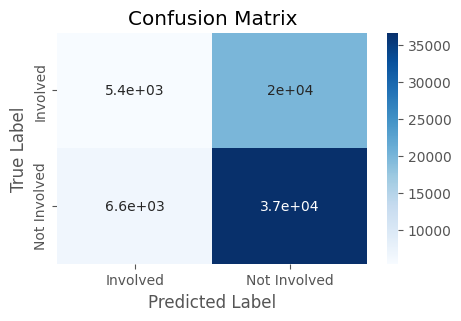

In [ ]:
y_pred = clf.predict(x_test_new)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()